# Machine Learning CS 559 – Final Project - Sonam De
### Predict a building's Energy Star score to analyze its energy performance


#### Dataset Information

Building energy data from New York City. 
Source: https://www1.nyc.gov/html/gbee/html/plan/ll84_scores.shtml

The target column:
ENERGY STAR score helps to assess how the building is performing. It helps to identify which buildings to target for improvement or recognition. A score of 50 is the median. So if a building scores below 50, it means it’s performing worse than 50 percent of similar buildings nationwide, while a score above 50 means it’s performing better than 50 percent of its peers. And a score of 75 or higher means it’s a top performer and may be eligible for ENERGY STAR certification.

A 1-to-100 percentile ranking based on self-reported energy usage for the reporting year. The Energy Star score is a relative measure used for comparing the energy efficiency of buildings.


#### Objective and Methods

Objective:

    To use the energy data to build a model that can predict the Energy Star Score of a building and interpret the results    to find the factors which influence the score.

Methods: 

    Supervised: we have access to both the features and the target and our goal is to train a model that can learn a mapping between the two:

    Regression: The Energy Star score is a continuous variable

    Cross Validation K fold Model

    Validating result with Linear Regression


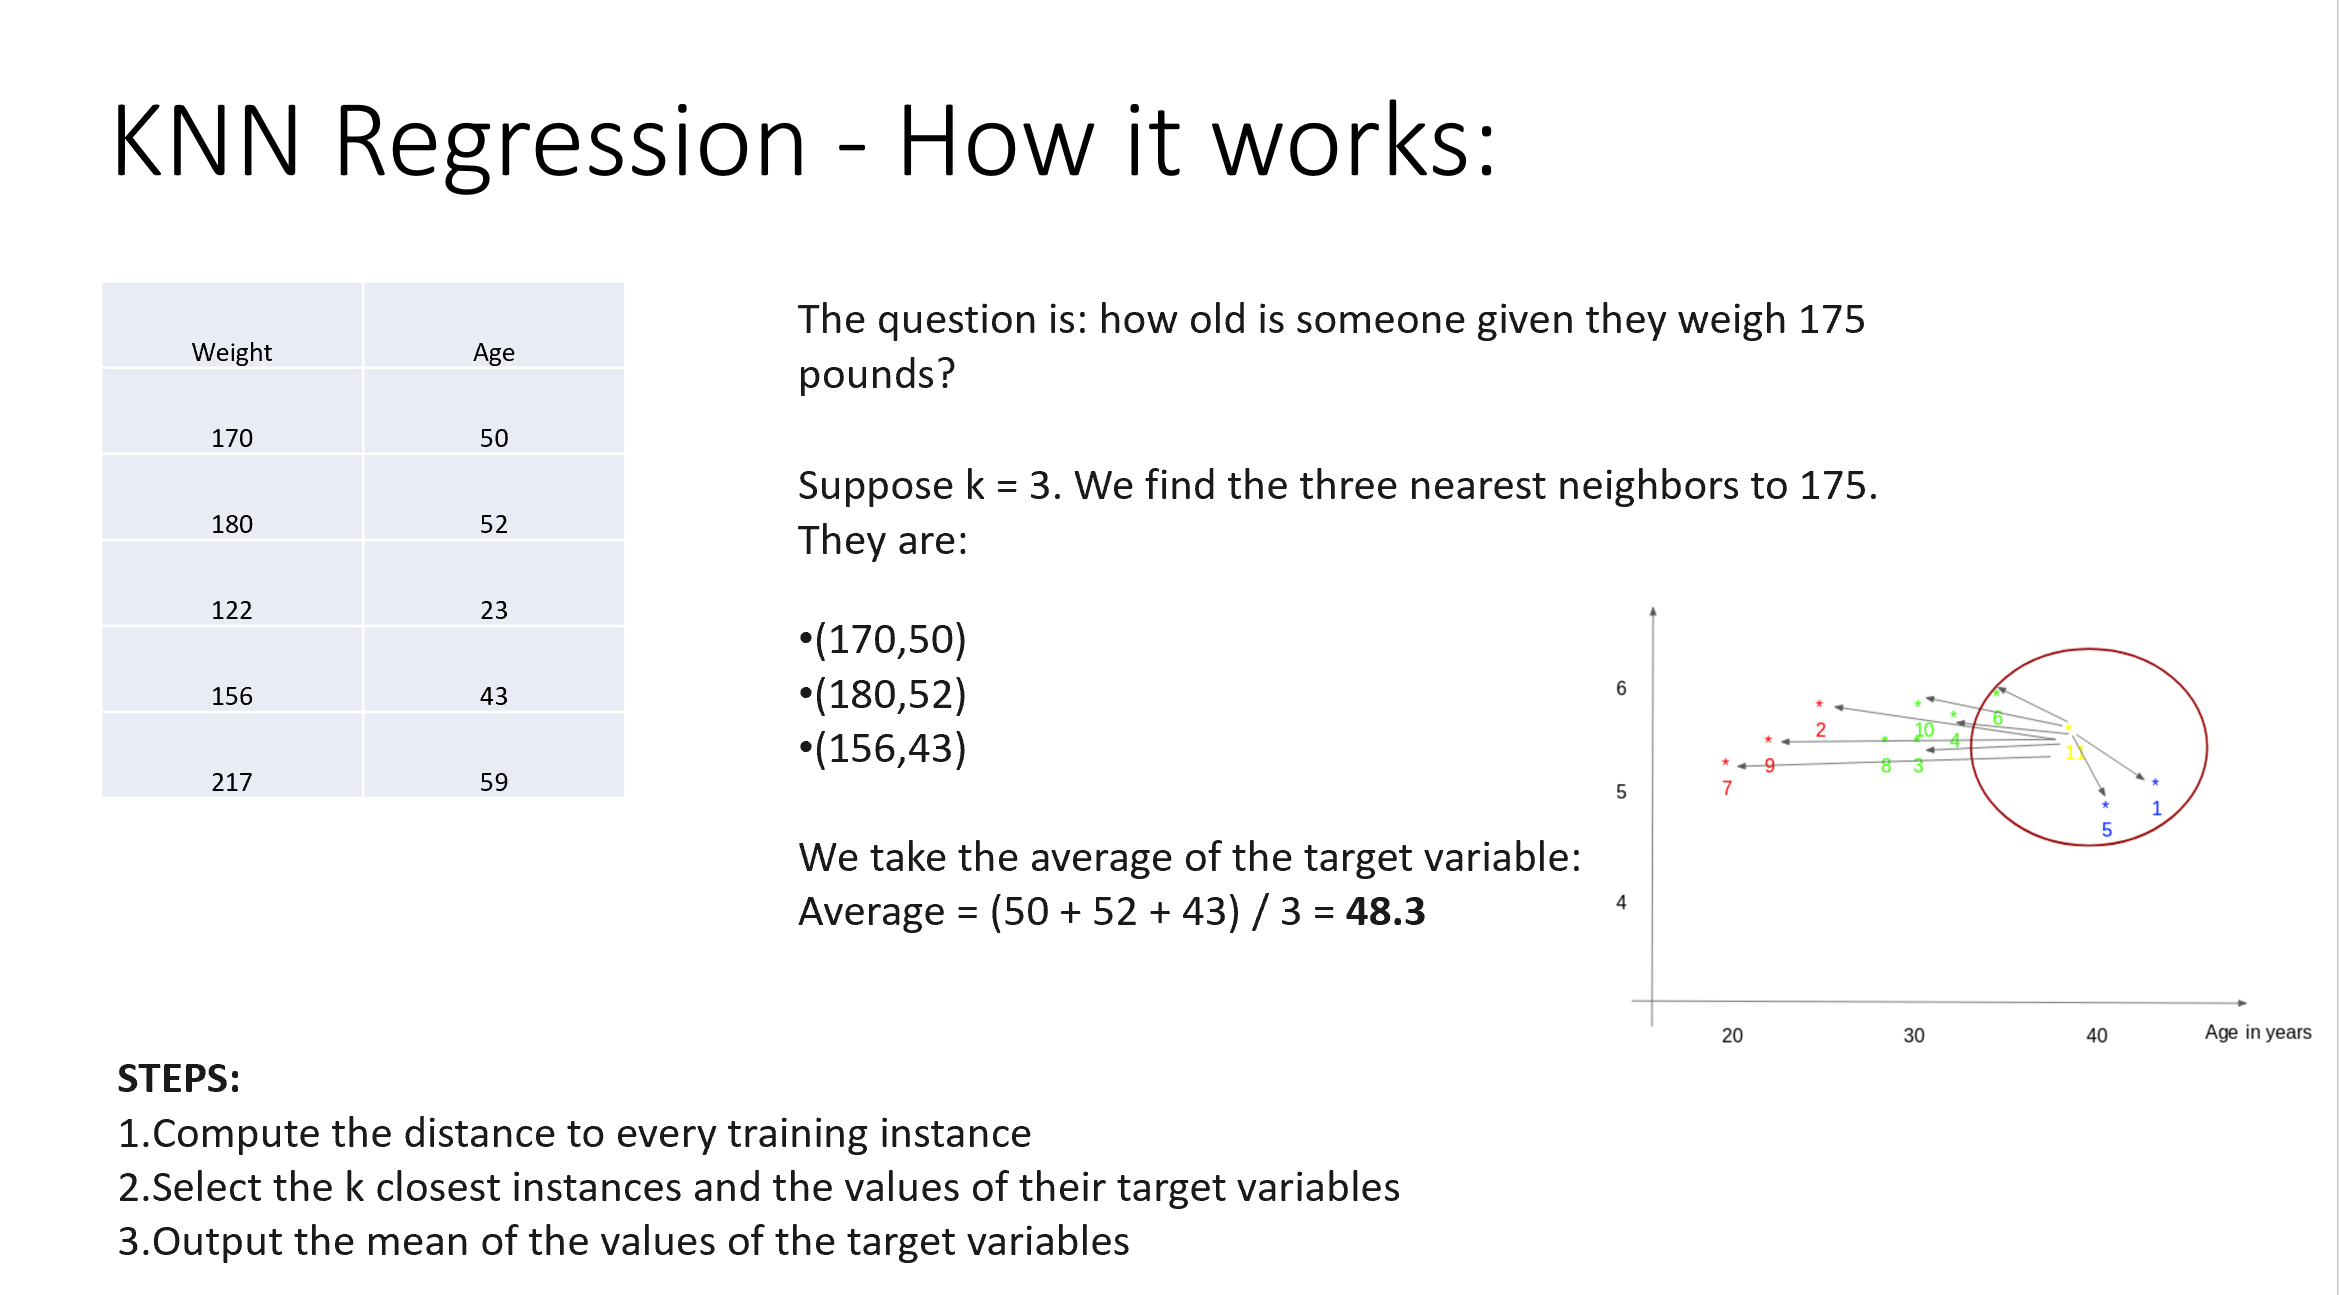

In [1]:
from PIL import Image
image = Image.open("slide.png")
image



#### Imports

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)



#### Data upload

In [3]:
# Read in data into a dataframe 
data = pd.read_excel('nyc_benchmarking_disclosure_2017_consumption_data.xlsx',sheet_name=1)

# Display top of dataframe
data.head()

Order  Property Id                   Property Name Parent Property Id  \
0      1      4593574           The Argonaut Building                NaN   
1      3      2967701  Cathedral Preparatory Seminary                NaN   
2      4      4898531                 The Nomad Hotel                NaN   
3      5      2917939          10 West 27 Street Corp                NaN   
4      6      3878205                 Westbury Realty                NaN   

  Parent Property Name  BBL - 10 digits  \
0                  NaN     1.010288e+09   
1                  NaN     4.018720e+09   
2                  NaN     1.008290e+09   
3                  NaN     1.008280e+09   
4                  NaN     1.000650e+09   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1010287502   
1                                   4-01872-0007   
2                                   1-00829-0050   
3                                   1-00828-0053   
4                                   1-00065-0024   

  NYC Building Identification Number (BIN) Address 1 (self-reported)  \
0                                  1024898          224 West 57th St   
1                                  4046340         56-25 92nd Street   
2                                  1080710             1170 Broadway   
3                                  1015657             1155 Broadway   
4                                  1001105            24 John Street   

  Address 2 (self-reported)  ... Annual Maximum Demand (kW)  \
0                       NaN  ...                        NaN   
1                       NaN  ...                        NaN   
2                       NaN  ...                        NaN   
3                       NaN  ...                        NaN   
4                       NaN  ...                        NaN   

  Annual Maximum Demand (MM/YYYY) Total GHG Emissions (Metric Tons CO2e)  \
0                             NaT                                  732.4   
1                             NaT                                  164.5   
2                             NaT                                 1150.2   
3                             NaT                                  273.4   
4                             NaT                                   90.7   

  Direct GHG Emissions (Metric Tons CO2e)  \
0                                    76.3   
1                                   109.9   
2                                   438.0   
3                                    98.2   
4                                     0.0   

  Indirect GHG Emissions (Metric Tons CO2e)  \
0                                     656.1   
1                                      54.6   
2                                     712.3   
3                                     175.3   
4                                      90.7   

   Water Use (All Water Sources) (kgal)  \
0                                3635.5   
1                                 102.9   
2                               10762.6   
3                                 790.1   
4                                 143.0   

  Water Use Intensity (All Water Sources) (gal/ft²) Water Required?  \
0                                             21.46       Not found   
1                                              1.09       Not found   
2                                             86.10       Not found   
3                                             15.80       Not found   
4                                              2.86       Not found   

  Generation Date  DOF Benchmarking Submission Status  
0      2018-02-14                           Not found  
1      2018-02-14                           Not found  
2      2018-02-14                           Not found  
3      2018-02-14                           Not found  
4      2018-02-14                           Not found  

[5 rows x 60 columns]

#### About the dataset:

This dataset is not at all clean :
    
    - The target variable here is ENERGY STAR score which is a continous variable.
    - There are features with missing data. 
    - Some of the column have catagorical values. 
    - Few columns have datatype as object for float variables. 
    - There are outliers. 
    - The data is not normalised
    

### 1: Data Preprocessing steps

#### Checking column data types and missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
Order                                                         34355 non-null int64
Property Id                                                   34355 non-null int64
Property Name                                                 34355 non-null object
Parent Property Id                                            1723 non-null object
Parent Property Name                                          1723 non-null object
BBL - 10 digits                                               33625 non-null float64
NYC Borough, Block and Lot (BBL) self-reported                33626 non-null object
NYC Building Identification Number (BIN)                      33123 non-null object
Address 1 (self-reported)                                     34355 non-null object
Address 2 (self-reported)                                     427 non-null object
Postal Code                                             

#### Observations :
There are a number of columns with numbers that have been recorded as object datatypes. These will have to be converted to float datatype before we can do any numerical analysis.

#### Convert Data to Correct Types

Convert the columns with numbers into numeric data types by replacing the "Not Available" and "Not found" entries with np.nan which can be interpreted as floats. Convert the columns that contain numeric values (such as square feet or energy usage) into numeric datatypes

In [5]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace('Not Available', np.nan)

# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft² ' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [6]:
# Statistics for each column
data.describe()

Order   Property Id  BBL - 10 digits  \
count  34355.000000  3.435500e+04     3.362500e+04   
mean   17355.145103  4.710374e+06     2.249470e+09   
std    10016.661222  1.676669e+06     1.193104e+09   
min        1.000000  7.365000e+03     0.000000e+00   
25%     8666.500000  2.825644e+06     1.014980e+09   
50%    17383.000000  4.897531e+06     2.032480e+09   
75%    26028.500000  6.297280e+06     3.058740e+09   
max    34686.000000  6.716654e+06     7.000500e+09   

       Self-Reported Gross Floor Area (ft²)  \
count                          3.435500e+04   
mean                           1.149392e+05   
std                            2.164591e+05   
min                            0.000000e+00   
25%                            4.227300e+04   
50%                            6.582000e+04   
75%                            1.136150e+05   
max                            1.507766e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       3.432300e+04    
mean                                        1.115422e+05    
std                                         2.108989e+05    
min                                         1.000000e+00    
25%                                         4.175000e+04    
50%                                         6.438100e+04    
75%                                         1.116050e+05    
max                                         1.507766e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        7226.000000   
mean                                        20136.231746   
std                                         51022.113092   
min                                             0.000000   
25%                                          3500.000000   
50%                                          8000.000000   
75%                                         16326.250000   
max                                        992059.400000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        2450.000000       34355.000000   
mean                                        11179.502776        1946.106855   
std                                         24105.730990          32.725881   
min                                             0.000000        1051.000000   
25%                                          1899.000000        1925.000000   
50%                                          5000.000000        1935.000000   
75%                                         11200.000000        1965.000000   
max                                        591640.000000        2021.000000   

       Number of Buildings     Occupancy  ...  \
count         34355.000000  34355.000000  ...   
mean              1.196565     98.393101  ...   
std               2.959191      8.917131  ...   
min               0.000000      0.000000  ...   
25%               1.000000    100.000000  ...   
50%               1.000000    100.000000  ...   
75%               1.000000    100.000000  ...   
max             161.000000    100.000000  ...   

       Weather Normalized Site Natural Gas Use (therms)  \
count                                      2.804700e+04   
mean                                       3.576895e+05   
std                                        3.329299e+07   
min                                        0.000000e+00   
25%                                        8.581150e+03   
50%                                        3.226560e+04   
75%                                        5.846190e+04   
max                                        3.936197e+09   

       Electricity Use - Grid Purchase (kBtu)  \
count                            3.157600e+04   
mean                             3.833599e+06   
std                              1.249719e+07   
min                             -6.343300e+03   
25%                              6.888429e+05   
50%                             

#### Checking for missing values in my dataset

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data)

The selected dataframe has 60 columns.
There are 43 columns that have missing values.


Missing Values  \
Propane Use (kBtu)                                           34354   
District Hot Water Use (kBtu)                                34347   
District Chilled Water Use (kBtu)                            34325   
Fuel Oil #1 Use (kBtu)                                       34319   
Diesel #2 Use (kBtu)                                         34285   
Address 2 (self-reported)                                    33928   
Fuel Oil #5 & 6 Use (kBtu)                                   33871   
District Steam Use (kBtu)                                    32787   
Parent Property Name                                         32632   
Parent Property Id                                           32632   
Fuel Oil #4 Use (kBtu)                                       31977   
Annual Maximum Demand (kW)                                   31972   
Annual Maximum Demand (MM/YYYY)                              31972   
3rd Largest Property Use Type                                31905   
3rd Largest Property Use Type - Gross Floor Are...           31905   
Fuel Oil #2 Use (kBtu)                                       28691   
2nd Largest Property Use - Gross Floor Area (ft²)            27129   
2nd Largest Property Use Type                                27129   
Metered Areas  (Water)                                       19809   
Water Use Intensity (All Water Sources) (gal/ft²)            16084   
Water Use (All Water Sources) (kgal)                         16075   
ENERGY STAR Score                                             8901   
Weather Normalized Site Natural Gas Intensity (...            6313   
Weather Normalized Site Natural Gas Use (therms)              6308   
Weather Normalized Site EUI (kBtu/ft²)                        5795   
Weather Normalized Source EUI (kBtu/ft²)                      5795   
Natural Gas Use (kBtu)                                        5536   
Weather Normalized Site Electricity Intensity (...            3354   
Weather Normalized Site Electricity (kWh)                     3342   
Electricity Use - Grid Purchase (kBtu)                        2779   
Electricity Use - Grid Purchase (kWh)                         2779   
Metered Areas (Energy)                                        2645   
Source EUI (kBtu/ft²)                                         2467   
Site EUI (kBtu/ft²)                                           2467   
Total GHG Emissions (Metric Tons CO2e)                        1398   
Indirect GHG Emissions (Metric Tons CO2e)                     1267   
Direct GHG Emissions (Metric Tons CO2e)                       1239   
NYC Building Identification Number (BIN)                      1232   
BBL - 10 digits                                                730   
NYC Borough, Block and Lot (BBL) self-reported                 729   
Largest Property Use Type - Gross Floor Area (ft²)              32   
Largest Property Use Type                                       32   
List of All Property Use Types at Property                      13   

                                                    % of Total Values  
Propane Use (kBtu)                                              100.0  
District Hot Water Use (kBtu)                                   100.0  
District Chilled Water Use (kBtu)                                99.9  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.8  
Address 2 (self-reported)                                        98.8  
Fuel Oil #5 & 6 Use (kBtu)                                       98.6  
District Steam Use (kBtu)                                        95.4  
Parent Property Name                                             95.0  
Parent Property Id                                               95.0  
Fuel Oil #4 Use (kBtu)                                           93.1  
Annual Maximum Demand (kW)                                       93.1  
Annual Maximum Demand (MM/YYYY)    

#### Observations

The above table shows that there are features with more than 50% of data missing . So removing those columns will not impact the model. Since, most machine learning models assumes that the data is numerical and contains no missing values, missing values needs to be handled before feeding it into a machine learning algorithm. There are several methods :

Mean/Median/Mode Imputation
Regression Imputation

Here I will use Mean Imoutation

In [9]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('Will remove %d columns.' % len(missing_columns))

The selected dataframe has 60 columns.
There are 43 columns that have missing values.
Will remove 19 columns.


In [10]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

In [11]:
data.shape

(34355, 41)

#### Energy star score distribution plot and verifying if there any outliers

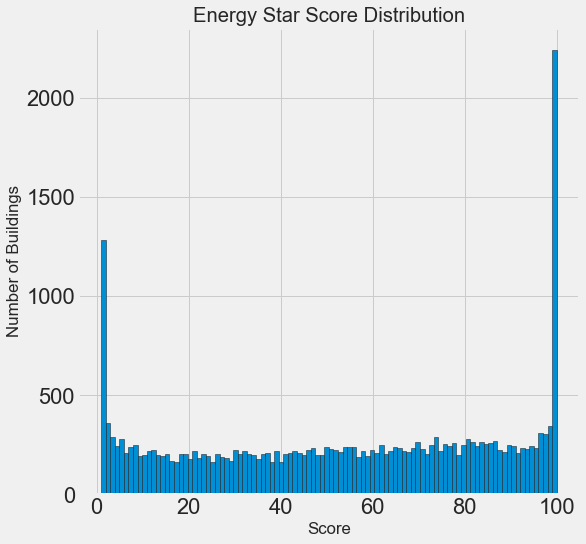

In [12]:
figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

The energy star distribution is not uniform. The score with value 0 and 100 have most of the building count. Since the dataset says self-reported energy usage, it may happens owners reported lower energy usage to score more. 

In [13]:
data['Site EUI (kBtu/ft²)'].describe()

count    3.188800e+04
mean     9.922633e+02
std      1.349948e+05
min      0.000000e+00
25%      5.800000e+01
50%      7.990000e+01
75%      1.034000e+02
max      2.405806e+07
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

6613       143221.0
6606       143221.0
25533      206060.4
5295       252180.7
5289       252180.7
9244       252180.7
4584       252180.7
17884      328065.6
17883     1340295.0
20192    24058060.0
Name: Site EUI (kBtu/ft²), dtype: float64

The above data shows two buildings are extreamly far from rest of the data. which shows presence of outliers.

In [15]:
num=[24058060.0,1340295.0]
data.loc[data['Site EUI (kBtu/ft²)'].isin(num)]

Order  Property Id    Property Name  BBL - 10 digits  \
17883  18092      6586418   2446 Lyvere St              NaN   
20192  20406      5820492  65 broadway llc     1.000210e+09   

      NYC Borough, Block and Lot (BBL) self-reported  \
17883                                            NaN   
20192                                   1-00021-0004   

      NYC Building Identification Number (BIN) Address 1 (self-reported)  \
17883                                      NaN            2446 Lyvere St   
20192                                  1000809               65 broadway   

      Postal Code Street Number Street Name  ...  \
17883       10461     Not found   Not found  ...   
20192       10006     Not found   Not found  ...   

      Electricity Use - Grid Purchase (kWh)  \
17883                              136043.3   
20192                             6787142.2   

      Weather Normalized Site Electricity (kWh)  \
17883                                  136157.7   
20192                                 6830963.1   

       Total GHG Emissions (Metric Tons CO2e)  \
17883                                    85.8   
20192                             535429700.0   

      Direct GHG Emissions (Metric Tons CO2e)  \
17883                                    46.5   
20192                                     0.0   

      Indirect GHG Emissions (Metric Tons CO2e)  \
17883                                      39.3   
20192                               535429700.0   

      Water Use (All Water Sources) (kgal)  \
17883                               6913.2   
20192                                  NaN   

       Water Use Intensity (All Water Sources) (gal/ft²)  Water Required?  \
17883                                          6913227.0        Not found   
20192                                                NaN        Not found   

       Generation Date  DOF Benchmarking Submission Status  
17883       2018-11-08                           Not found  
20192       2018-12-09                           Not found  

[2 rows x 41 columns]

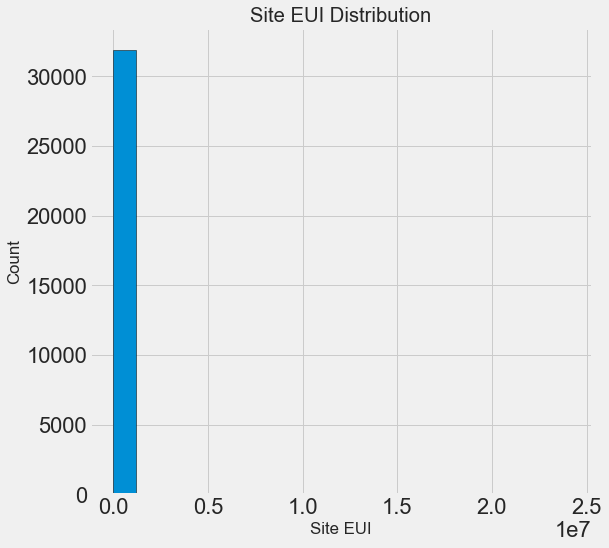

In [16]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

#### Removing Outliers

In [17]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

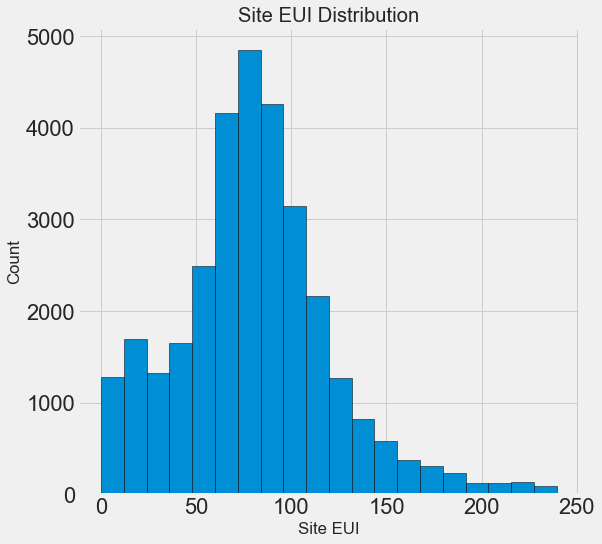

In [18]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

The above histogram is skewed towards right but still we have a nice distribution

#### Co-relation between building types (catagorical features) and energy score

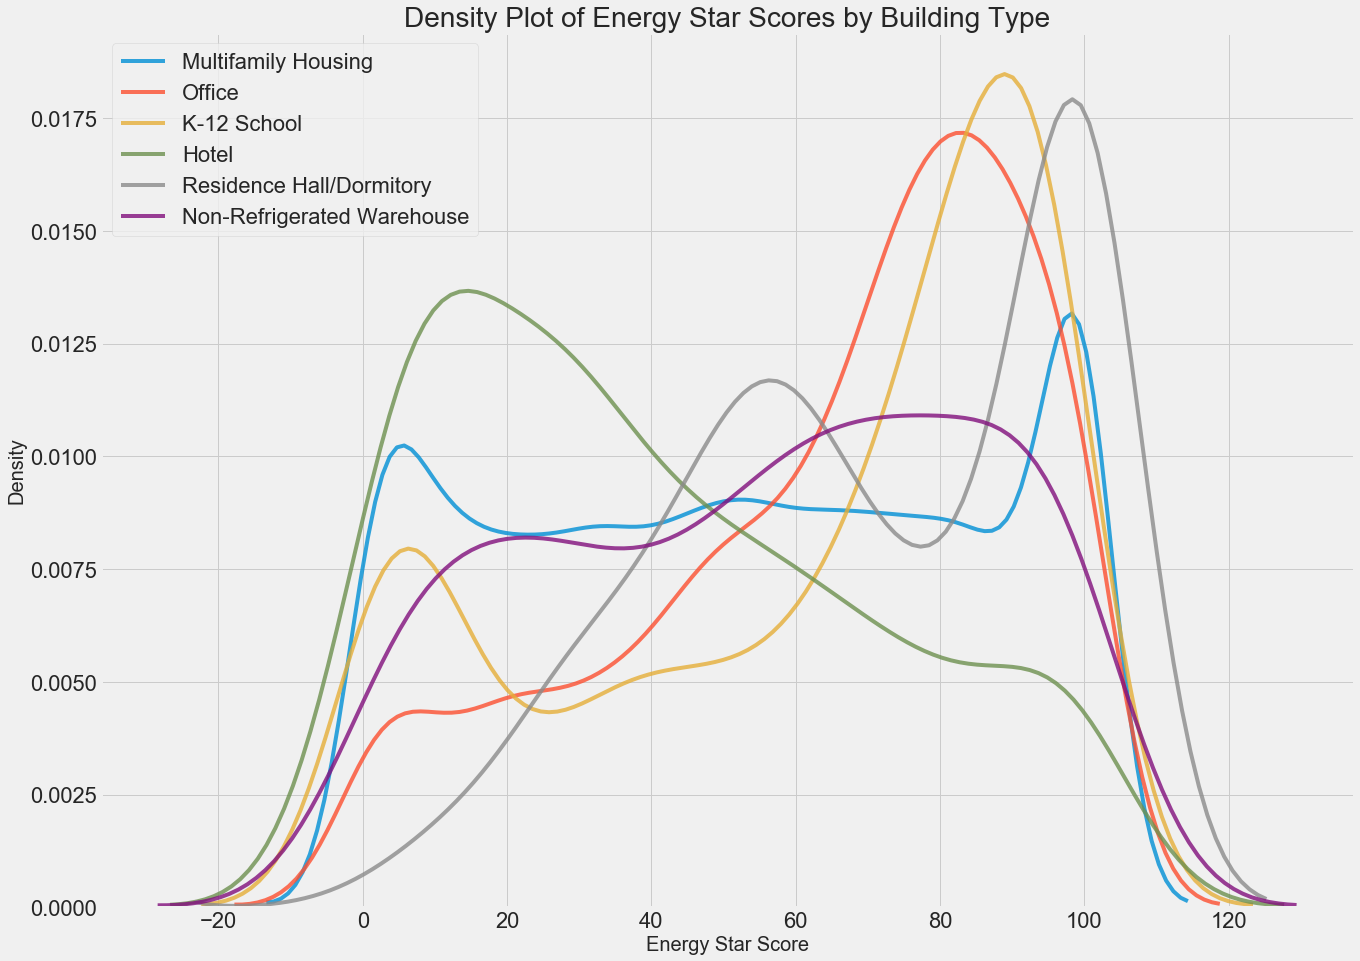

In [19]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 200].index)

# Plot of distribution of scores for building categories
figsize(20, 15)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]

    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

The above clearly shows that the different building type has different Energy Star Score distribution. So, building type does have an effect on the score

#### Correlations between Features and Target

In [20]:
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.764947
Weather Normalized Site EUI (kBtu/ft²)                       -0.759865
Weather Normalized Source EUI (kBtu/ft²)                     -0.676350
Source EUI (kBtu/ft²)                                        -0.664716
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.477838
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.349015
Property Id                                                  -0.138856
Order                                                        -0.098902
Direct GHG Emissions (Metric Tons CO2e)                      -0.094196
Weather Normalized Site Natural Gas Use (therms)             -0.080714
Natural Gas Use (kBtu)                                       -0.079888
Total GHG Emissions (Metric Tons CO2e)                       -0.068426
Occupancy                                                    -0.048963
Electricity Use - Grid Purchase (kWh)                        -0.018676
Electr

There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Site EUI (kBtu/ft²), Weather Normalized Site EUI (kBtu/ft²), Weather Normalized Source EUI (kBtu/ft²) and Source EUI (kBtu/ft²) . The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better - as the EUI increases, the Energy Star Score tends to decrease.

Taking log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculating the correlations between all of the features and the score, and displaying the top 15 most positive and top 15 most negative correlations.

### 2: Feature Engineering and Feature selections:

In [21]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\sonam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sonam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sonam\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero enc

#### Co-relation between Energy star score and site energy usage intensity for different type of buildings

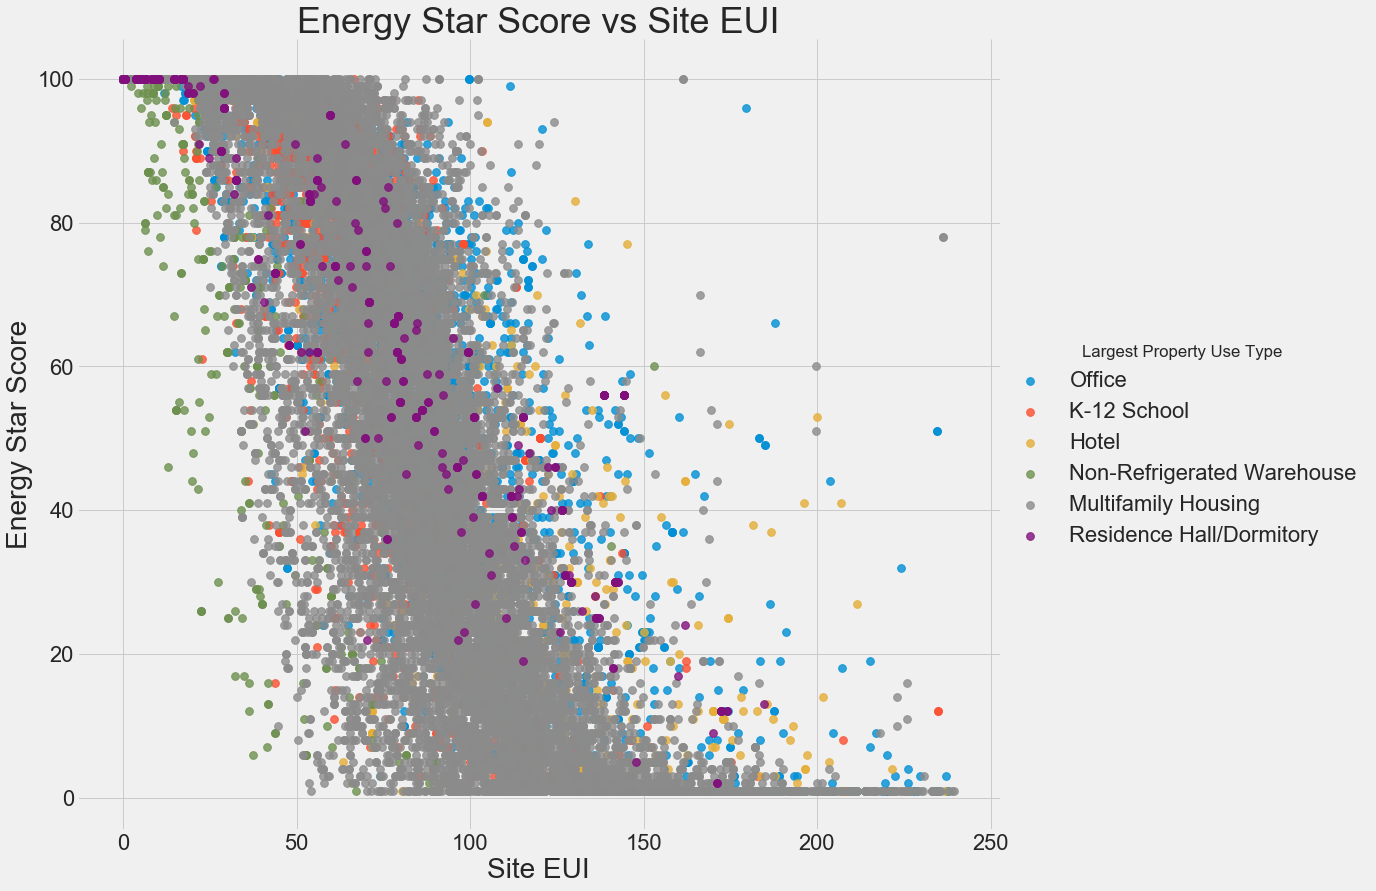

In [22]:
figsize(20, 15)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

This plot clearly shows that the Site EUI is strongly co-related to Energy star score.

#### Pair Plots

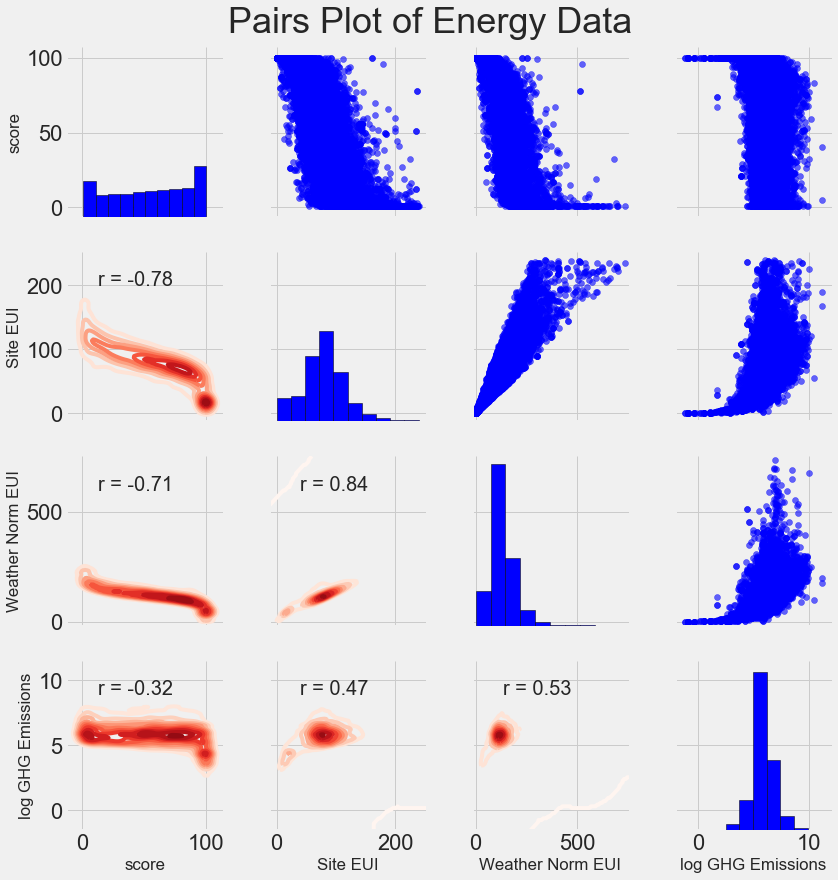

In [23]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'blue', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'blue', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

In [24]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\sonam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


(31104, 126)

#### Removing Colinear Features

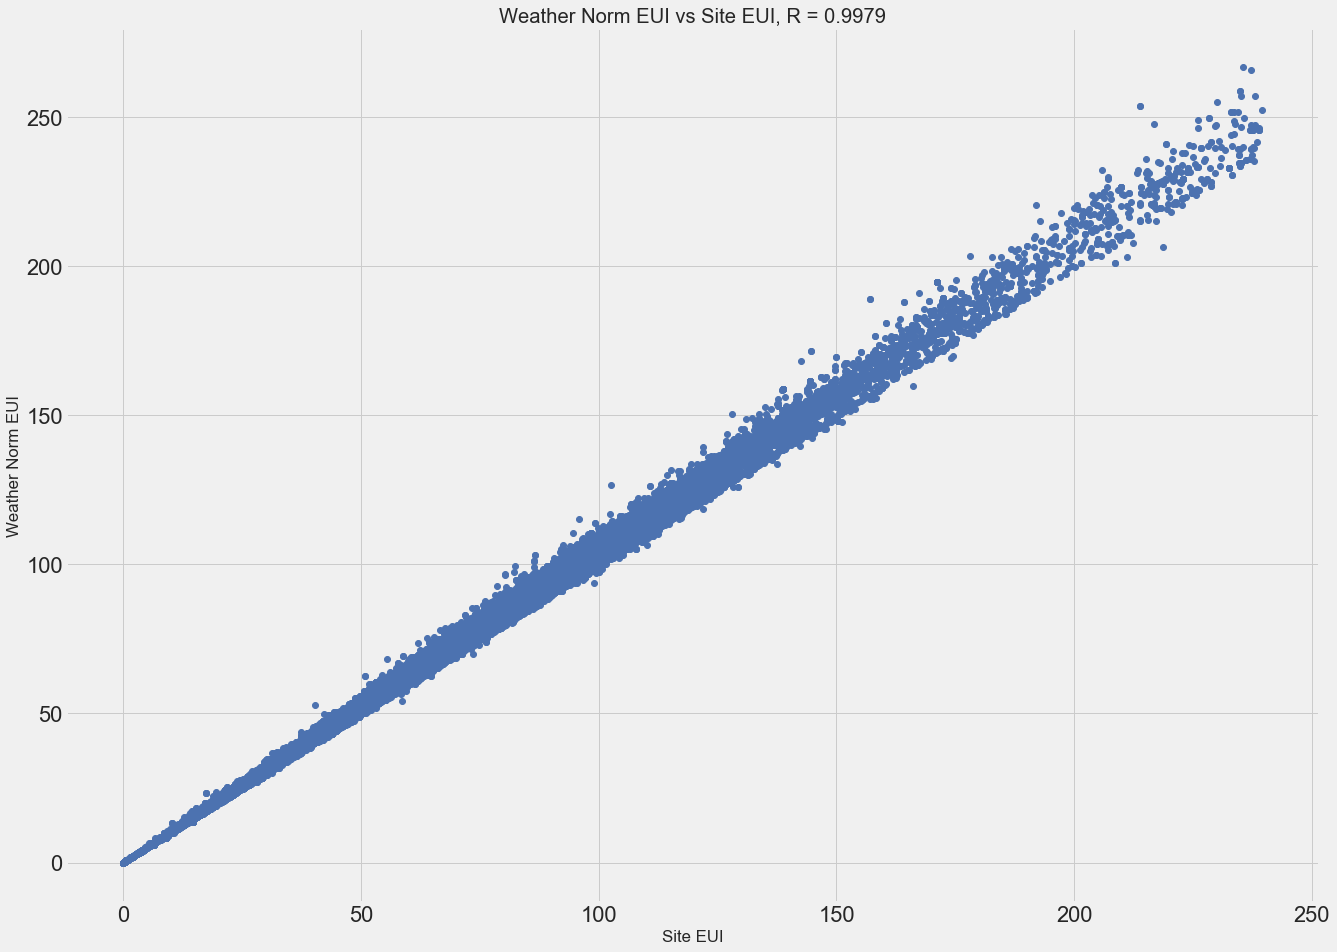

In [25]:

plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

There are so many features which are highly co-related to each other making a straight dional line. Removing those features and reducing the dimention of the dataset will help is creating correct model.

In [26]:
def remove_collinear_features(x, threshold):
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Source EUI (kBtu/ft²)',
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [27]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

C:\Users\sonam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater_equal


In [28]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(31104, 86)

#### Split data into Training and Test set

In [29]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(6130, 86)
(24974, 86)


In [30]:
from sklearn.model_selection import train_test_split
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(17481, 85)
(7493, 85)
(17481, 1)
(7493, 1)


### 3: Finding Metrics and implementing Model

#### Mean Absolute Error

In [31]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [32]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 57.00
Baseline Performance on the test set: MAE = 27.9674


In [33]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)

In [34]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (17481, 85)
Testing Feature Size:   (7493, 85)
Training Labels Size:   (17481, 1)
Testing Labels Size:    (7493, 1)


In [35]:
# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)
X.shape

(17481, 85)

In [36]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

Missing values in training features:  0
Missing values in testing features:   0
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


#### Scaling

In [37]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X_nor = scaler.transform(X)
X_test_nor = scaler.transform(X_test)

In [38]:

# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [39]:
X_test_nor

array([[0.69248068, 0.72892314, 0.20129915, ..., 0.        , 0.        ,
        0.        ],
       [0.75928382, 0.52593999, 0.60800149, ..., 0.        , 0.        ,
        0.        ],
       [0.09906585, 0.86808594, 0.19744204, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64023757, 0.60103053, 0.60535133, ..., 0.        , 0.        ,
        0.        ],
       [0.43391766, 0.95730012, 0.40033053, ..., 0.        , 0.        ,
        0.        ],
       [0.98647791, 0.65535254, 0.19861945, ..., 0.        , 0.        ,
        0.        ]])

In [41]:
temp=np.copy(score)
print('Missing values in training features: ', np.sum(np.isnan(temp)))
temp[np.isnan(temp)] = np.mean(temp[~np.isnan(temp)])
print('Missing values in training features: ', np.sum(np.isnan(temp)))
# Make sure all values are finite

temp[~np.isfinite(temp)] = 0
print(np.where(~np.isfinite(temp)))
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
temp_nor=scaler.fit(temp)
temp_nor_trans=scaler.transform(temp)

Missing values in training features:  22100
Missing values in training features:  0
(array([], dtype=int64), array([], dtype=int64))


### Metrics Used

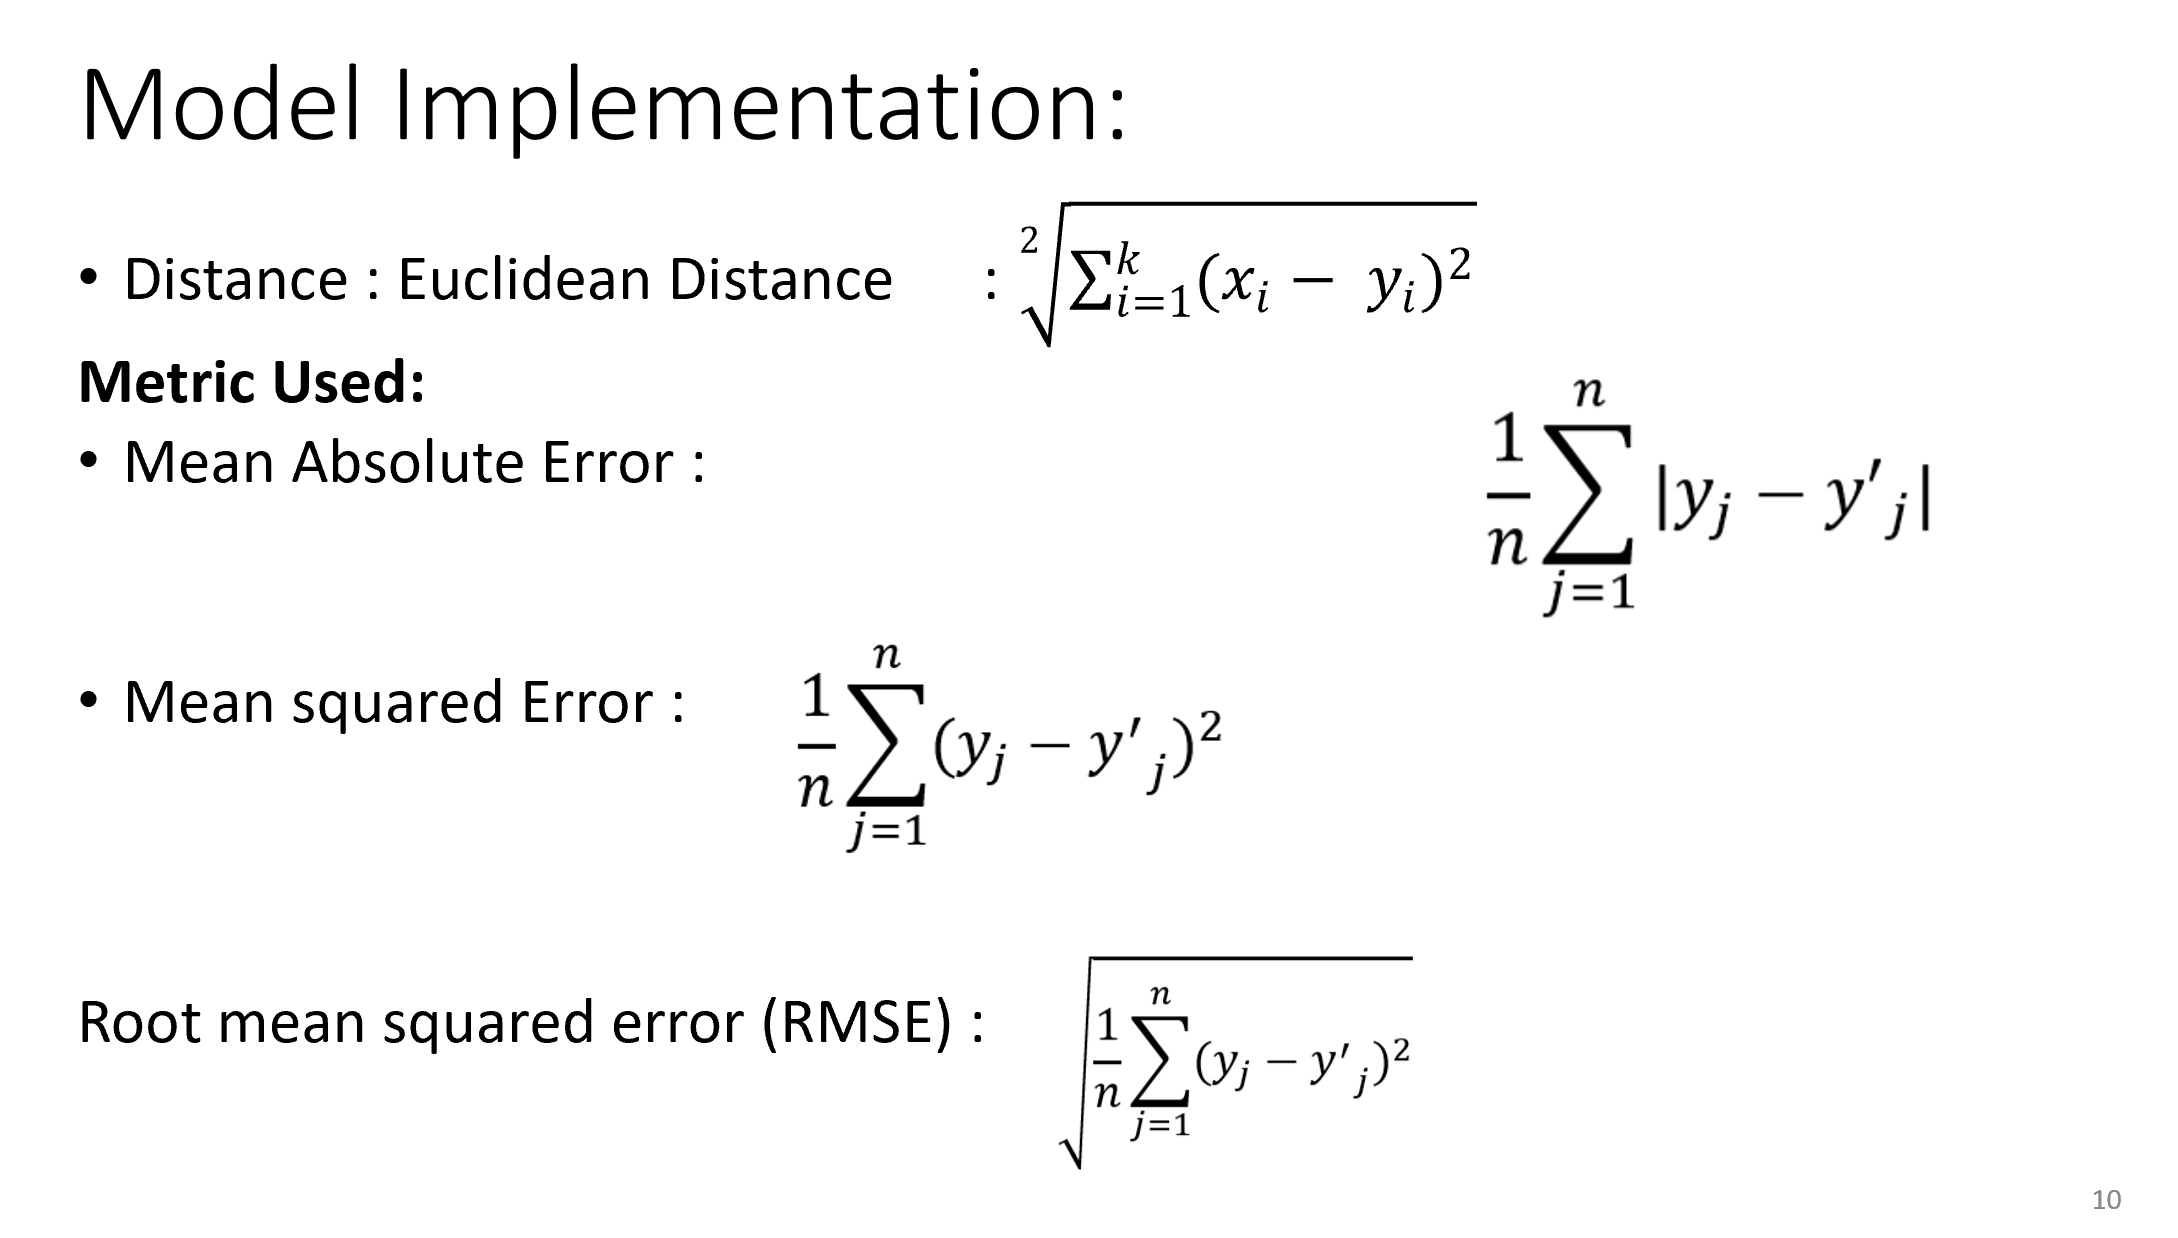

In [83]:
metric_image = Image.open("slide1.png")
metric_image


## Cross Validated K fold KNN Model

In [43]:
import numpy as np 
class CrossValidatedKFolds:
 
    def __init__(self, np_dataset):
        self.__np_dataset = np_dataset
   
    # Returns 5 folds: 
    def get_five_folds(self):
        no_of_columns = np.size(self.__np_dataset,1)
        no_of_rows = np.size(self.__np_dataset,0)
 
        fold0 = np.arange(1)
        fold1 = np.arange(1)
        fold2 = np.arange(1)
        fold3 = np.arange(1)
        fold4 = np.arange(1)
        np.random.shuffle(self.__np_dataset)
        strat_bin_column = no_of_columns - 1
        unique_bin_arr = np.unique(self.__np_dataset[:,strat_bin_column])

        unique_bin_arr_size = unique_bin_arr.size

        for unique_bin_arr_idx in range(0, unique_bin_arr_size):
            counter = 0
            for row in range(0, no_of_rows):
                if unique_bin_arr[unique_bin_arr_idx] == (self.__np_dataset[row,strat_bin_column]):
                        if counter == 0:
                            if np.size(fold0) == 1:
                                fold0 = self.__np_dataset[row,:]
                                counter += 1
                            else:
                                new_row = self.__np_dataset[row,:]
                                fold0 = np.vstack([fold0,new_row])
                                counter += 1
                        elif counter == 1:
                            if np.size(fold1) == 1:
                                fold1 = self.__np_dataset[row,:]
                                counter += 1
                            else:
                                new_row = self.__np_dataset[row,:]
                                fold1 = np.vstack([fold1,new_row])
                                counter += 1
                        elif counter == 2:
                            if np.size(fold2) == 1:
                                fold2 = self.__np_dataset[row,:]
                                counter += 1
                            else:
                                new_row = self.__np_dataset[row,:]
                                fold2 = np.vstack([fold2,new_row])
                                counter += 1
                        elif counter == 3:
                            if np.size(fold3) == 1:
                                fold3 = self.__np_dataset[row,:]
                                counter += 1
                            else:
                                new_row = self.__np_dataset[row,:]
                                fold3 = np.vstack([fold3,new_row])
                                counter += 1
                        else:
                            if np.size(fold4) == 1:
                                fold4 = self.__np_dataset[row,:]
                                counter = 0
                            else:
                                new_row = self.__np_dataset[row,:]
                                fold4 = np.vstack([fold4,new_row])
                                counter = 0
        return fold0, fold1, fold2, fold3, fold4

In [44]:
class Knn:
    def __init__(self, k):
        self.__k = k
  
    def get_neighbors(self, training_set, test_instance):
        no_of_training_instances = np.size(training_set,0)
        no_of_training_columns = np.size(training_set,1)
        actual_class_column = None
        actual_class_column = no_of_training_columns - 2
        actual_class_and_distance = np.zeros((no_of_training_instances, 2))
        neighbors = None
        for row in range(0, no_of_training_instances):
            actual_class_and_distance[row,0] = training_set[row,actual_class_column]
            temp_training_instance = np.copy(training_set[row,:])
            temp_test_instance = np.copy(test_instance)
            temp_training_instance = np.delete(temp_training_instance,[0,actual_class_column,actual_class_column+1])
            temp_test_instance = np.delete(temp_test_instance,[0,actual_class_column,actual_class_column+1])
 
            # Calculate the euclidean distance from the temporary test
            # instance to the temporary training instance
            distance = np.linalg.norm(temp_test_instance - temp_training_instance)
            actual_class_and_distance[row,1] = distance
            
        actual_class_and_distance = actual_class_and_distance[actual_class_and_distance[:,1].argsort()]
        k = self.__k
        neighbors = actual_class_and_distance[:k,:]
 
        return neighbors
 
    def make_prediction(self, neighbors):  
        prediction = None
        prediction = np.mean(neighbors)
        return prediction

    def get_accuracy(self, actual_class_array, predicted_class_array):
        accuracy = None
        decision = None
        counter = None
        actual_class_array_size = actual_class_array.size
        squared_error_array = np.empty(actual_class_array_size)
        squared_error = None
        for row in range(0,actual_class_array_size):
            # Calculate the squared error
            # When plotting negative mean squared error
            squared_error1 = ((actual_class_array[row] - predicted_class_array[row]))
            
            # When Plotting positive mean squared error
            squared_error = (abs((actual_class_array[row] - predicted_class_array[row]))) 
            
            squared_error *= squared_error
            squared_error_array[row] = squared_error
        mean_squared_error = np.mean(squared_error_array)
        accuracy = mean_squared_error
        return accuracy

In [45]:
k = 3
np_data_set = temp_nor_trans
NO_OF_FOLDS = 5
fivefolds = CrossValidatedKFolds(np_data_set)
fold0, fold1, fold2, fold3, fold4 = fivefolds.get_five_folds()

In [58]:
 def cross_validated_error(NO_OF_FOLDS):
    training_dataset = None
    test_dataset = None

    accuracy_statistics = np.zeros(NO_OF_FOLDS)
    knn1=Knn(k)

    for experiment in range(0, NO_OF_FOLDS):

        if experiment == 0:
            test_dataset = fold0
            training_dataset = np.concatenate((fold1, fold2, fold3, fold4), axis=0)
        elif experiment == 1:
            test_dataset = fold1
            training_dataset = np.concatenate((fold0, fold2, fold3, fold4), axis=0)
        elif experiment == 2:
            test_dataset = fold2
            training_dataset = np.concatenate((fold0, fold1, fold3, fold4), axis=0)
        elif experiment == 3:
            test_dataset = fold3
            training_dataset = np.concatenate((fold0, fold1, fold2, fold4), axis=0)
        else:
            test_dataset = fold4
            training_dataset = np.concatenate((fold0, fold1, fold2, fold3), axis=0)
        # Actual class column index of the test dataset
        actual_class_column = None          
        actual_class_column = np.size(test_dataset,1) - 2
        actual_class_values = test_dataset[:,actual_class_column]
        no_of_test_instances = np.size(test_dataset,0)
        predicted_class_values = np.zeros(no_of_test_instances)
        for row in range(0, no_of_test_instances):
            this_instance = test_dataset[row,:]
            neighbor_array = knn1.get_neighbors(training_dataset,this_instance)
            neighbors_arr = neighbor_array[:,0]
            prediction = knn1.make_prediction(neighbors_arr)
            predicted_class_values[row] = prediction
        accuracy = knn1.get_accuracy(actual_class_values, predicted_class_values)
        accuracy_statistics[experiment] = accuracy
    accuracy = np.mean(accuracy_statistics)
    return accuracy

In [47]:
print(accuracy_statistics)

[-0.02718855 -0.02897262 -0.02916103 -0.02801815 -0.02722509]


In [48]:
print("Mean Squared Error: %.3f" % accuracy)

Mean Squared Error: -0.028


### Error report from Cross validated K - Fold - Mean squared Error

In [50]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 20)
NO_OF_FOLDS = 5
k_scores = []
for k in k_range:
    accuracy=cross_validated_error(NO_OF_FOLDS)
    k_score.append(accuracy)
    print('MSE value for k= ' , K , 'is:', accuracy)


MSE value for k=  1 is: 0.03549306732483795
MSE value for k=  2 is: 0.030118672113168658
MSE value for k=  3 is: 0.028681027193808228
MSE value for k=  4 is: 0.0284861182274214
MSE value for k=  5 is: 0.028513858846784524
MSE value for k=  6 is: 0.028926493146420377
MSE value for k=  7 is: 0.029665898851485854
MSE value for k=  8 is: 0.030141285904849234
MSE value for k=  9 is: 0.030762892363871436
MSE value for k=  10 is: 0.031193719136374396
MSE value for k=  11 is: 0.03187531035873258
MSE value for k=  12 is: 0.032384348278953916
MSE value for k=  13 is: 0.03299682034250904
MSE value for k=  14 is: 0.03359642106848083
MSE value for k=  15 is: 0.0342168589771676
MSE value for k=  16 is: 0.03487540749046644
MSE value for k=  17 is: 0.03537062740102965
MSE value for k=  18 is: 0.03587718124507711
MSE value for k=  19 is: 0.036385136292950766
MSE value for k=  20 is: 0.03696352591948122


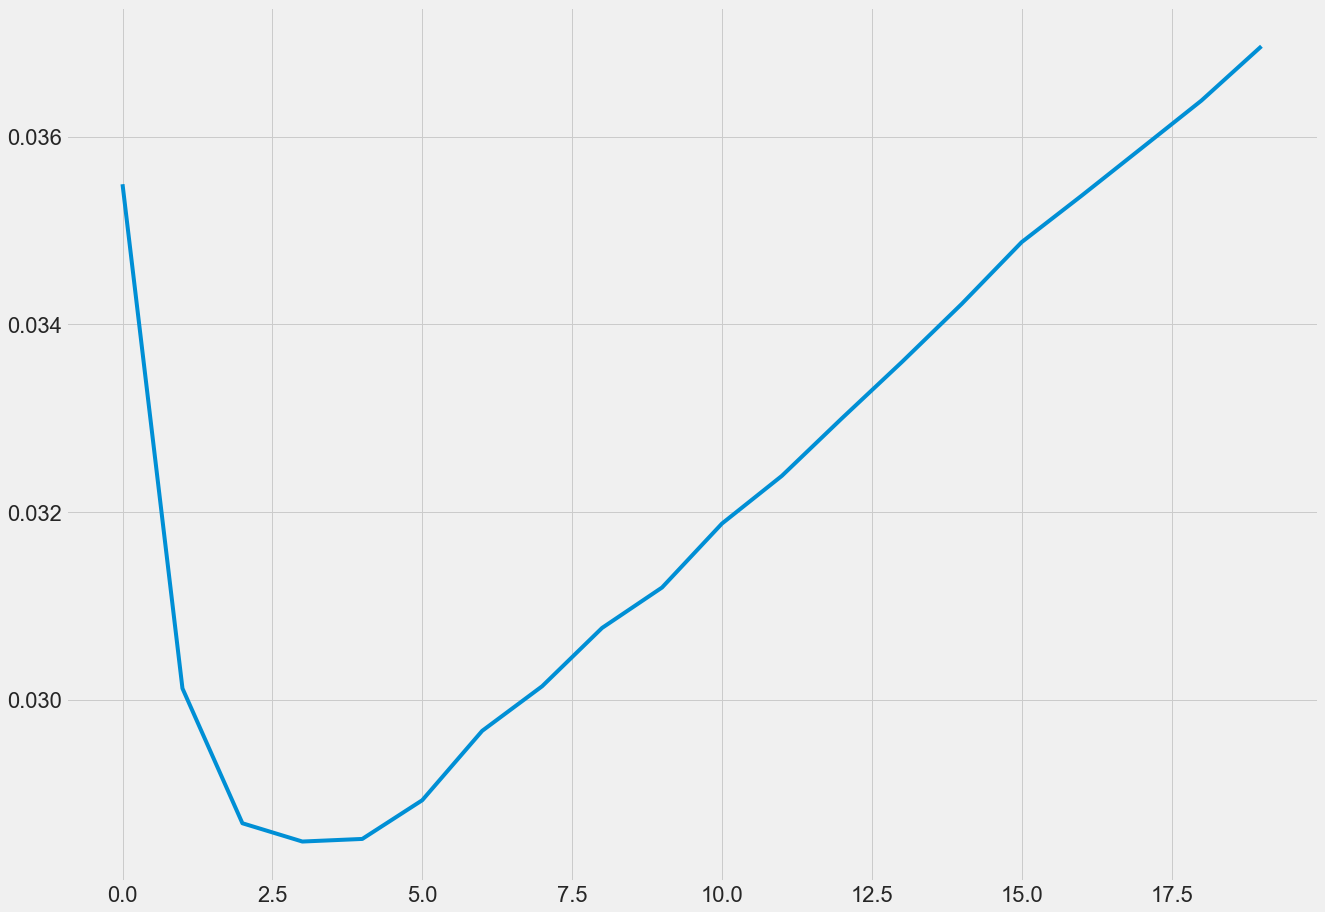

In [51]:
plt.plot(k_score)

##### Negative mean squared error

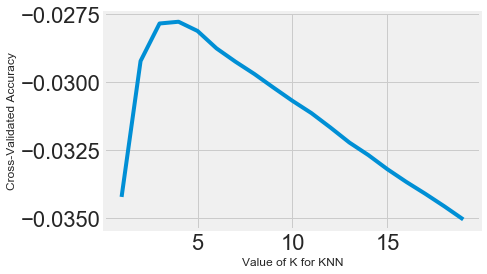

In [52]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 20)
NO_OF_FOLDS = 5
k_scores = []
for k in k_range:
    accuracy=cross_validated_error(NO_OF_FOLDS)
    k_score.append(accuracy)
    
    
get_neighbors()
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

##### Positive mean squared error

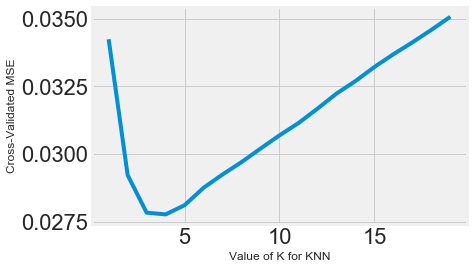

In [53]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 20)
NO_OF_FOLDS = 5
k_scores = []
for k in k_range:
    accuracy=cross_validated_error(NO_OF_FOLDS)
    k_score.append(accuracy)
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

The Cross validated K- Fold KNN model works well in prediction on test datasets with a nice elbow curve , where K value between 3 to 5 is the best neighbor value with lowest MSE error.

### Validating my implemented model with sciket learn library using Mean Absolute Error (MAE)

In [70]:
# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [71]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train_1, y_train_1)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test_1)
    model_mae = mae(y_test_1, model_pred)
    
    # Return the performance metric
    return model_mae

#### Linear Regression MAE error

In [55]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 15.4833


#### KNN Regression MAE error

In [56]:
knn = KNeighborsRegressor(n_neighbors=5)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 11.4642


#### Comparing KNN Model with Linear Regression

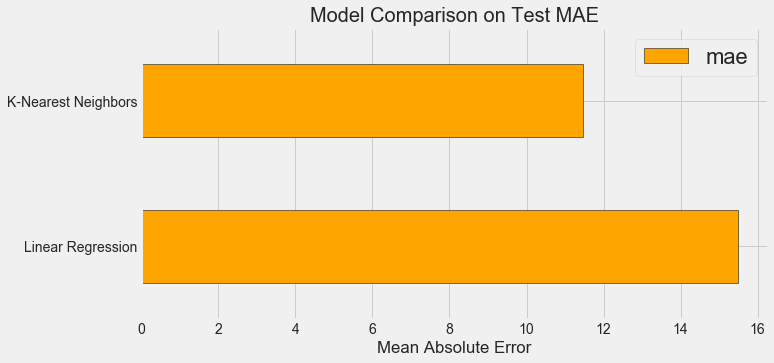

In [57]:
plt.style.use('fivethirtyeight')
figsize(10, 5)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'K-Nearest Neighbors'],
                                 'mae': [lr_mae,knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'orange', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

From the above plot we can see that KNN regression works better than Linear regression